In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
%config InlineBackend.figure_format = 'retina'
import os

In [ ]:
train = pd.read_csv("/Users/sergey/Desktop/semi/train.csv")
test = pd.read_csv("/Users/sergey/Desktop/semi/test.csv")

In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
# ---------------------------------------------------
train = pd.read_csv("/Users/sergey/Desktop/semi/train.csv")
test = pd.read_csv("/Users/sergey/Desktop/semi/test.csv")

def read_all_xyz_data(my_dataset,train=1):
    ga_cols = []; al_cols = []; in_cols = []; o_cols = [];   
    for my_ in range(6):  ga_cols.append('ga_'+str(my_)); 
    for my_ in range(6):  al_cols.append('al_'+str(my_)); 
    for my_ in range(6):  in_cols.append('in_'+str(my_)); 
    for my_ in range(6):  o_cols.append('o_'+str(my_)); 
   
    ga_df = pd.DataFrame(columns=ga_cols)
    al_df = pd.DataFrame(columns=al_cols)
    in_df = pd.DataFrame(columns=in_cols)
    o_df  = pd.DataFrame(columns= o_cols)
    # -----------------------------------------------    
    if train == 1:
        Local_ids  = my_dataset.id.values
        Local_Path = "/Users/sergey/Desktop/semi/train/{}/geometry.xyz"
    if train == 0:
        Local_ids = my_dataset.id.values
        Local_Path = "/Users/sergey/Desktop/semi/test/{}/geometry.xyz"
    # -----------------------------------------------
    print(Local_ids)
    for i in Local_ids: 
        #if i==6: break; # для тестов и проверок пока берем 5 файликов
        filename = Local_Path.format(i)
        print("--------------------> "+filename)
        ga_list = []
        al_list = []
        o_list  = []
        in_list = []
        # -----------------------------------------------    
        with open(filename) as f:
            for line in f.readlines():
                if line.rfind('atom')==-1: continue # пропускаем шапку
                x = line.split(' ')
                # print('-->',x[4],'--')
                # группируем атомы в группы
                if line.rfind("Ga")!=-1: ga_list.append(np.array(x[1:4], dtype=np.float))
                if line.rfind("Al")!=-1: al_list.append(np.array(x[1:4], dtype=np.float))
                if line.rfind("In")!=-1: in_list.append(np.array(x[1:4], dtype=np.float))
                if line.rfind("O") !=-1:  o_list.append(np.array(x[1:4], dtype=np.float))
        # -----------------------------------------------------------    
        # -- тут понижаем размерность для каждой группы точек
        # пример результата 
        #[[-1.52497367  1.67679902]
        # [ 7.94587215 -0.57142152]
        # [-6.42089847 -1.1053775 ]]    
        for mmy_ in range(4):
            if mmy_==0: my_list = ga_list; my_df = ga_df;
            if mmy_==1: my_list = al_list; my_df = al_df;
            if mmy_==2: my_list = in_list; my_df = in_df;
            if mmy_==3: my_list = o_list;  my_df = o_df;
            # ---------------------------------------------
            if (len(my_list)<2): temp_my=[0,0,0,0,0,0]
            else:
                model = PCA(n_components=2)
                my_list = np.array(my_list)
                temp_my = model.fit_transform(my_list.transpose())
                # проходим по 2м циклам: вложенному списку и внешнему
                temp_my = [item for sublist in temp_my for item in sublist]
            my_df.loc[i] = temp_my
            #print('=>',my_df.head())
    # -----------------------------------------------
    # подцепляем эти датафреймы к оригинальному
    ga_df["id"] = ga_df.index
    my_dataset = pd.merge(my_dataset, ga_df, on='id',how = "left")
    al_df["id"] = al_df.index
    my_dataset = pd.merge(my_dataset, al_df, on='id',how = "left")
    in_df["id"] = in_df.index
    my_dataset = pd.merge(my_dataset, in_df, on='id',how = "left")
    o_df["id"] = o_df.index
    my_dataset = pd.merge(my_dataset, o_df, on='id',how = "left")
    my_dataset[['in_0','in_1','in_2','in_3','in_4','in_5']] = my_dataset[['in_0','in_1','in_2','in_3','in_4','in_5']].astype(float)
    return my_dataset
# ---------------------------------------------------

new_train = read_all_xyz_data(train,1)
#print('=>',new_train.head())


new_test = read_all_xyz_data(test,0)
#print('=>',new_test.head())
print(new_test.dtypes)

#print(train.head(5))

[   1    2    3 ..., 2398 2399 2400]
--------------------> /Users/sergey/Desktop/semi/train/1/geometry.xyz
--------------------> /Users/sergey/Desktop/semi/train/2/geometry.xyz


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in divide


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [3]:
y=new_train.as_matrix()

In [5]:
new_train = pd.read_csv("/Users/sergey/Desktop/semi/new_train.csv")
new_test = pd.read_csv("/Users/sergey/Desktop/semi/new_test.csv")

In [6]:
y[:,3]

NameError: name 'y' is not defined

NameError: name 'new_train' is not defined

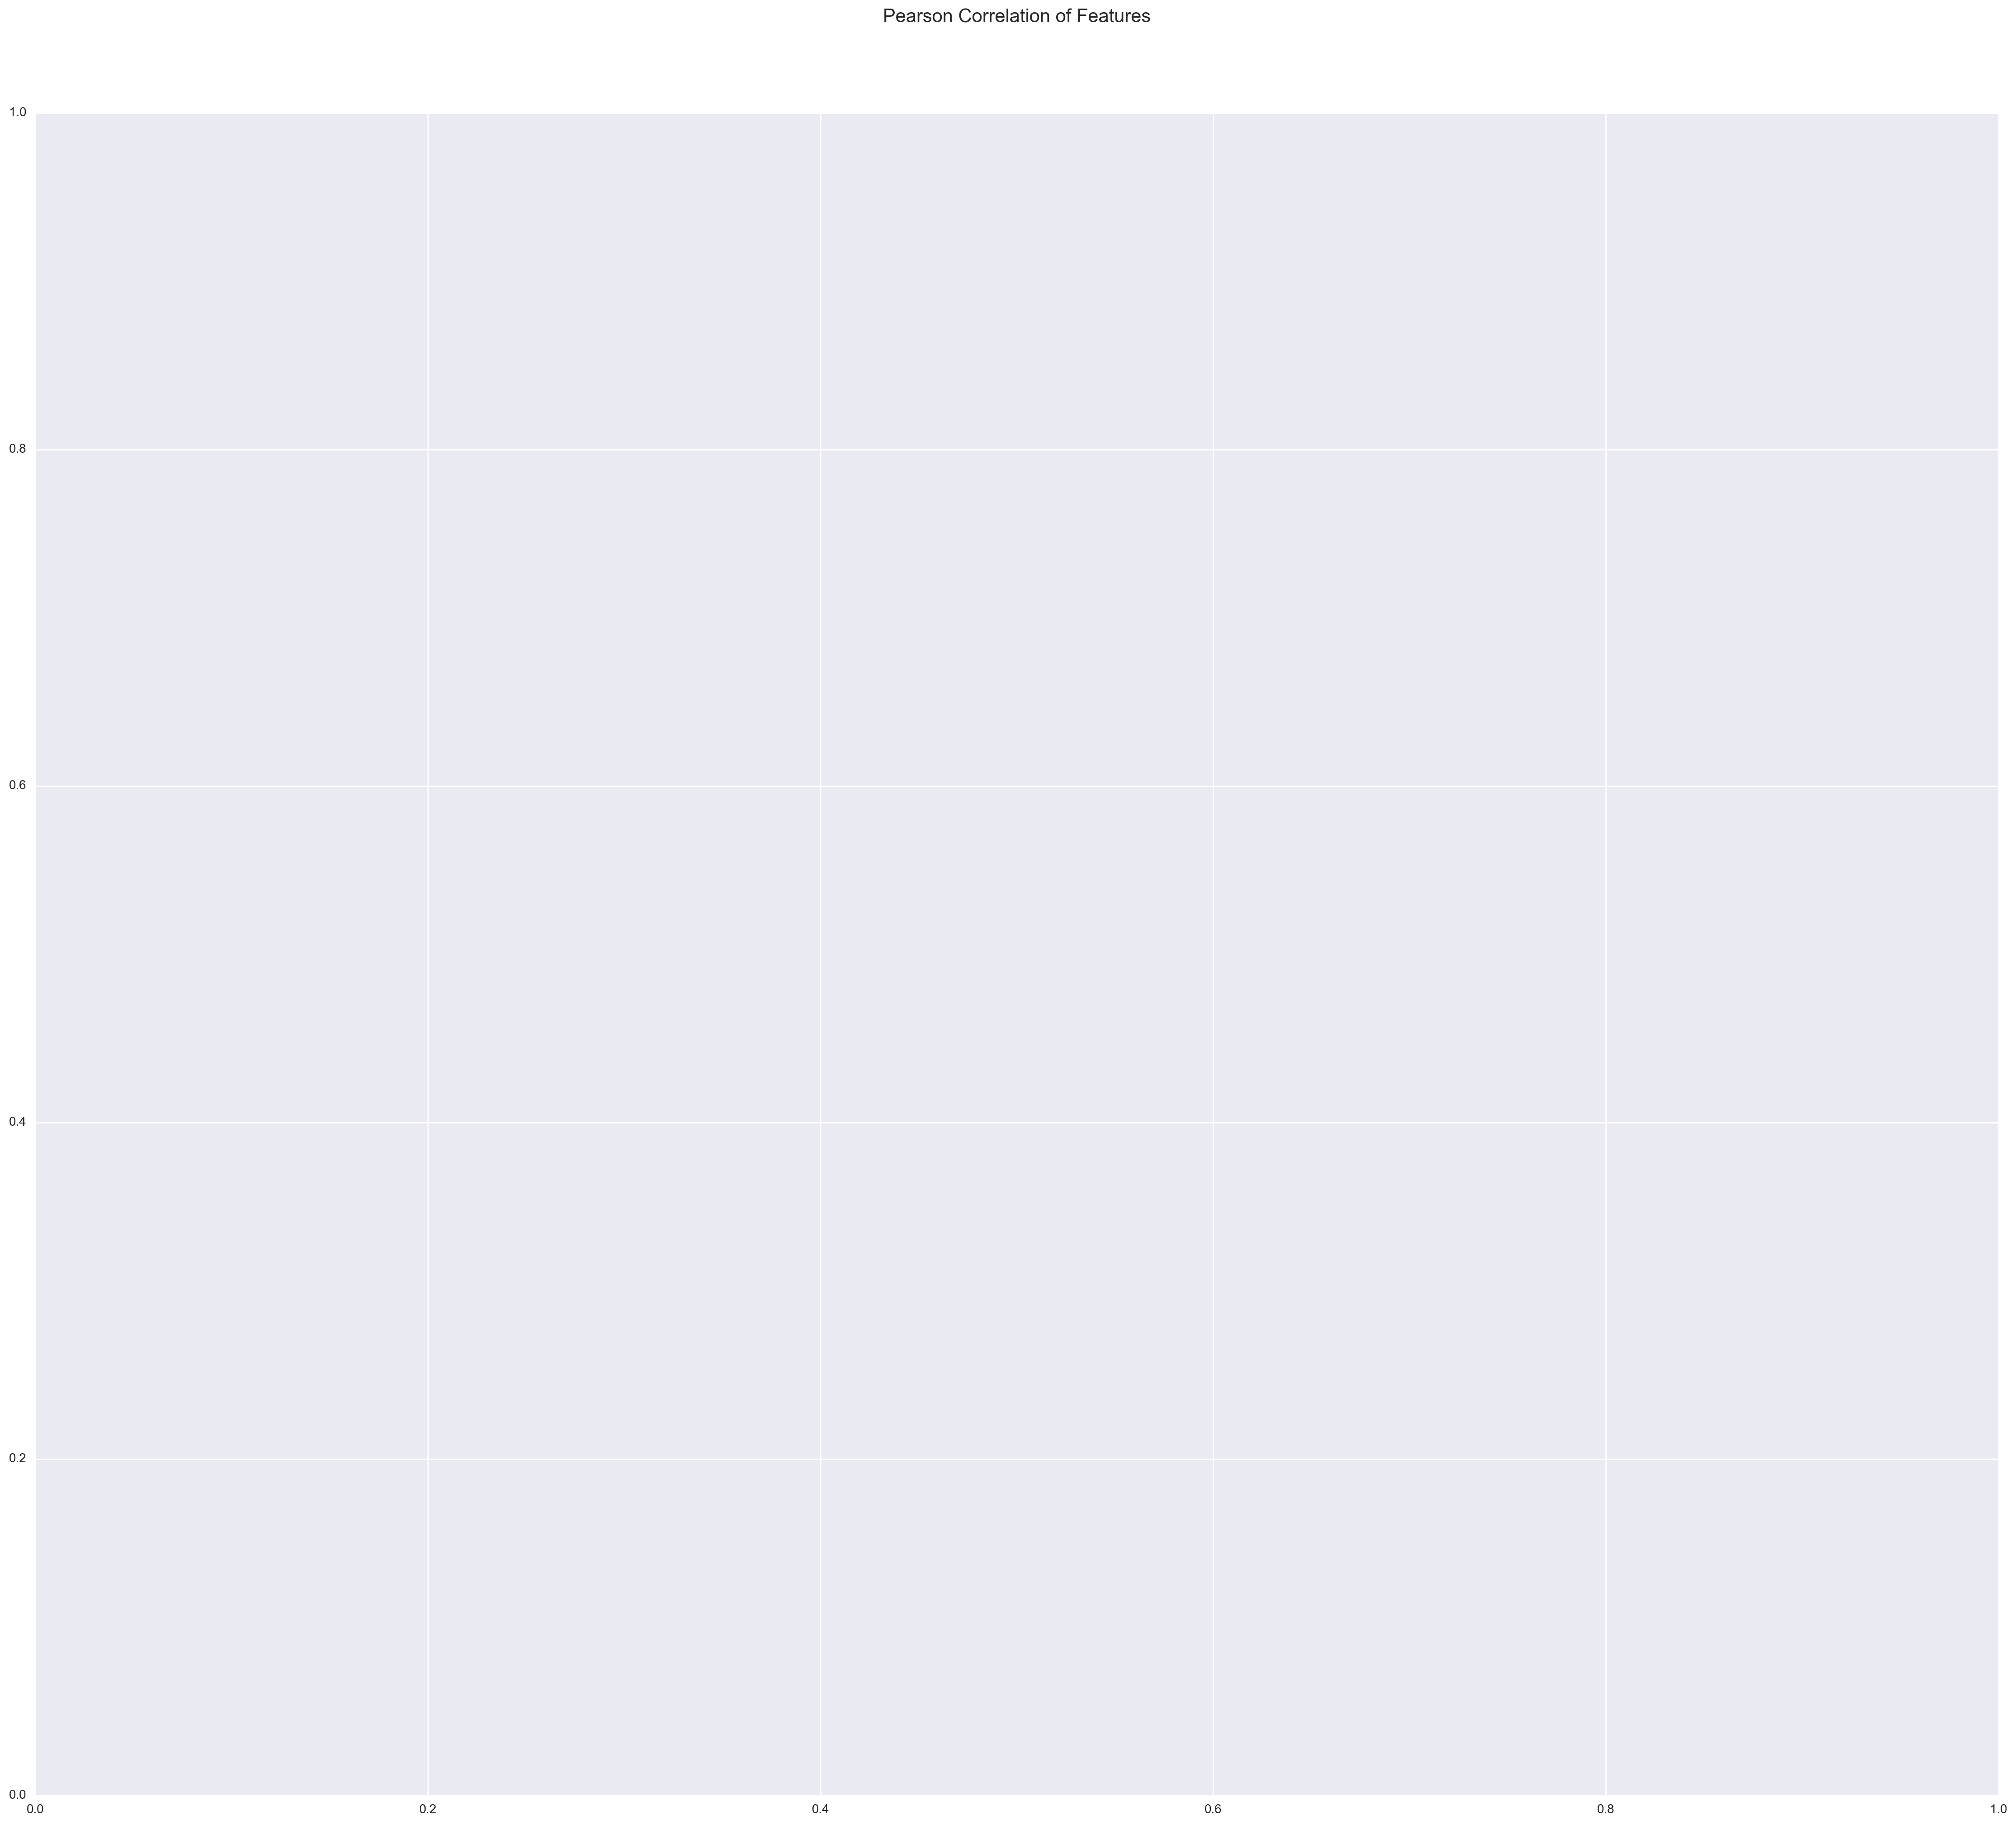

In [89]:
colormap = plt.cm.RdBu
plt.figure(figsize=(28,24))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(new_train.astype(float).corr(),linewidths=0.01,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [23]:
new_train.to_csv('/Users/sergey/Desktop/semi/new_train.csv', index=False)
new_test.to_csv('/Users/sergey/Desktop/semi/new_test.csv', index=False)

NameError: name 'new_train' is not defined

In [140]:
from sklearn.model_selection import train_test_split
def make_df(fin):
    """
    Args:
        fin (str) - file name with training or test data
    Returns:
        DataFrame with renamed columns (personal preference)
    """
    df = pd.read_csv(fin)
    df = df.rename(columns={'spacegroup' : 'sg',
                            'number_of_total_atoms' : 'Natoms',
                            'percent_atom_al' : 'x_Al',
                            'percent_atom_ga' : 'x_Ga',
                            'percent_atom_in' : 'x_In',
                            'lattice_vector_1_ang' : 'a',
                            'lattice_vector_2_ang' : 'b',
                            'lattice_vector_3_ang' : 'c',
                            'lattice_angle_alpha_degree' : 'alpha',
                            'lattice_angle_beta_degree' : 'beta',
                            'lattice_angle_gamma_degree' : 'gamma',
                            'formation_energy_ev_natom' : 'E',
                            'bandgap_energy_ev' : 'Eg'})
    return df

f_train = os.path.join('/Users/sergey/Desktop/semi/', 'new_train.csv')
df_train = make_df(f_train)
df_train.head()
f_test = os.path.join('/Users/sergey/Desktop/semi/', 'new_test.csv')
df_test = make_df(f_test)
pd.set_option('display.max_columns', 50)
df_test.head()

,id,sg,Natoms,x_Al,x_Ga,x_In,a,b,c,alpha,beta,gamma,ga_0,ga_1,ga_2,ga_3,ga_4,ga_5,al_0,al_1,al_2,al_3,al_4,al_5,in_0,in_1,in_2,in_3,in_4,in_5,o_0,o_1,o_2,o_3,o_4,o_5
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006,-1.217431,7.615849,9.922421,-3.061302,-8.704990,-4.554548,5.765706,-0.819612,-1.753608,3.548391,-4.012098,-2.728779,-6.939157,-3.962924,-0.814587,6.795588,7.753744,-2.832664,-10.077103,-12.721040,17.684365,-1.242266,-7.607262,13.963306
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015,7.094650,-1.096057,-2.508329,6.161241,-4.586321,-5.065184,-2.343354,9.032044,-8.342452,-6.184483,10.685806,-2.847561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.048054,-12.233763,16.723316,-0.688336,-7.675262,12.922098
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014,-4.353754,0.324080,-5.143576,-0.306597,9.497330,-0.017483,-5.497190,-2.404426,-3.936175,2.685165,9.433365,-0.280739,-4.914356,-1.223963,-3.590513,1.357926,8.504869,-0.133963,-12.111092,-4.421025,-6.519648,5.403909,18.630740,-0.982884
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002,31.651253,-0.167255,-14.677610,3.542080,-16.973643,-3.374826,29.600857,-0.540030,-17.508598,-4.156969,-12.092260,4.696999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.256826,-0.245287,-27.863888,-7.807420,-25.392938,8.052706
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001,27.417968,-0.285408,-14.883274,-4.855191,-12.534694,5.140599,19.834144,-0.233128,-11.459003,-2.132510,-8.375141,2.365637,27.301489,-0.108903,-12.967463,3.317993,-14.334026,-3.209089,53.434182,-0.260821,-27.962429,-8.262954,-25.471754,8.523775


In [141]:
df_test['ga']= df_test.iloc[:, -18:-13].min(axis=1)
df_test['al']= df_test.iloc[:, -24:-19].min(axis=1)
df_test['in']= df_test.iloc[:, -30:-25].min(axis=1)
df_test['o']= df_test.iloc[:, -36:-31].min(axis=1)
df_test['sum']= df_test.iloc[:, -36:-13].mean(axis=1)/1000
##################################################
df_train['ga']= df_train.iloc[:, -18:-13].min(axis=1)
df_train['al']= df_train.iloc[:, -24:-19].min(axis=1)
df_train['in']= df_train.iloc[:, -30:-25].min(axis=1)
df_train['o']= df_train.iloc[:, -36:-31].min(axis=1)
df_train['sum']= df_train.iloc[:, -36:-13].mean(axis=1)/1000

In [142]:
df_train=df_train.drop(["ga_0","ga_1","ga_2","ga_3","ga_4","ga_5","in_0","in_1","in_2","in_3","in_4","in_5",
                "al_0","al_1","al_2","al_3","al_4","al_5","o_0","o_1","o_2","o_3","o_4","o_5"], axis=1)

In [144]:
df_train.head()

,id,sg,Natoms,x_Al,x_Ga,x_In,a,b,c,alpha,beta,gamma,E,Eg,ga,al,in,o,sum
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387,-8.065853,-4.515422,-6.919791,0.000,0.013095
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210,-18.419275,-10.965841,-10.811701,0.000,0.014747
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438,-13.379833,-6.420898,-1.524974,0.000,0.010648
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492,-7.992108,0.000000,0.000000,0.250,0.013967
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793,0.000000,-16.058151,-19.086240,0.375,0.013895


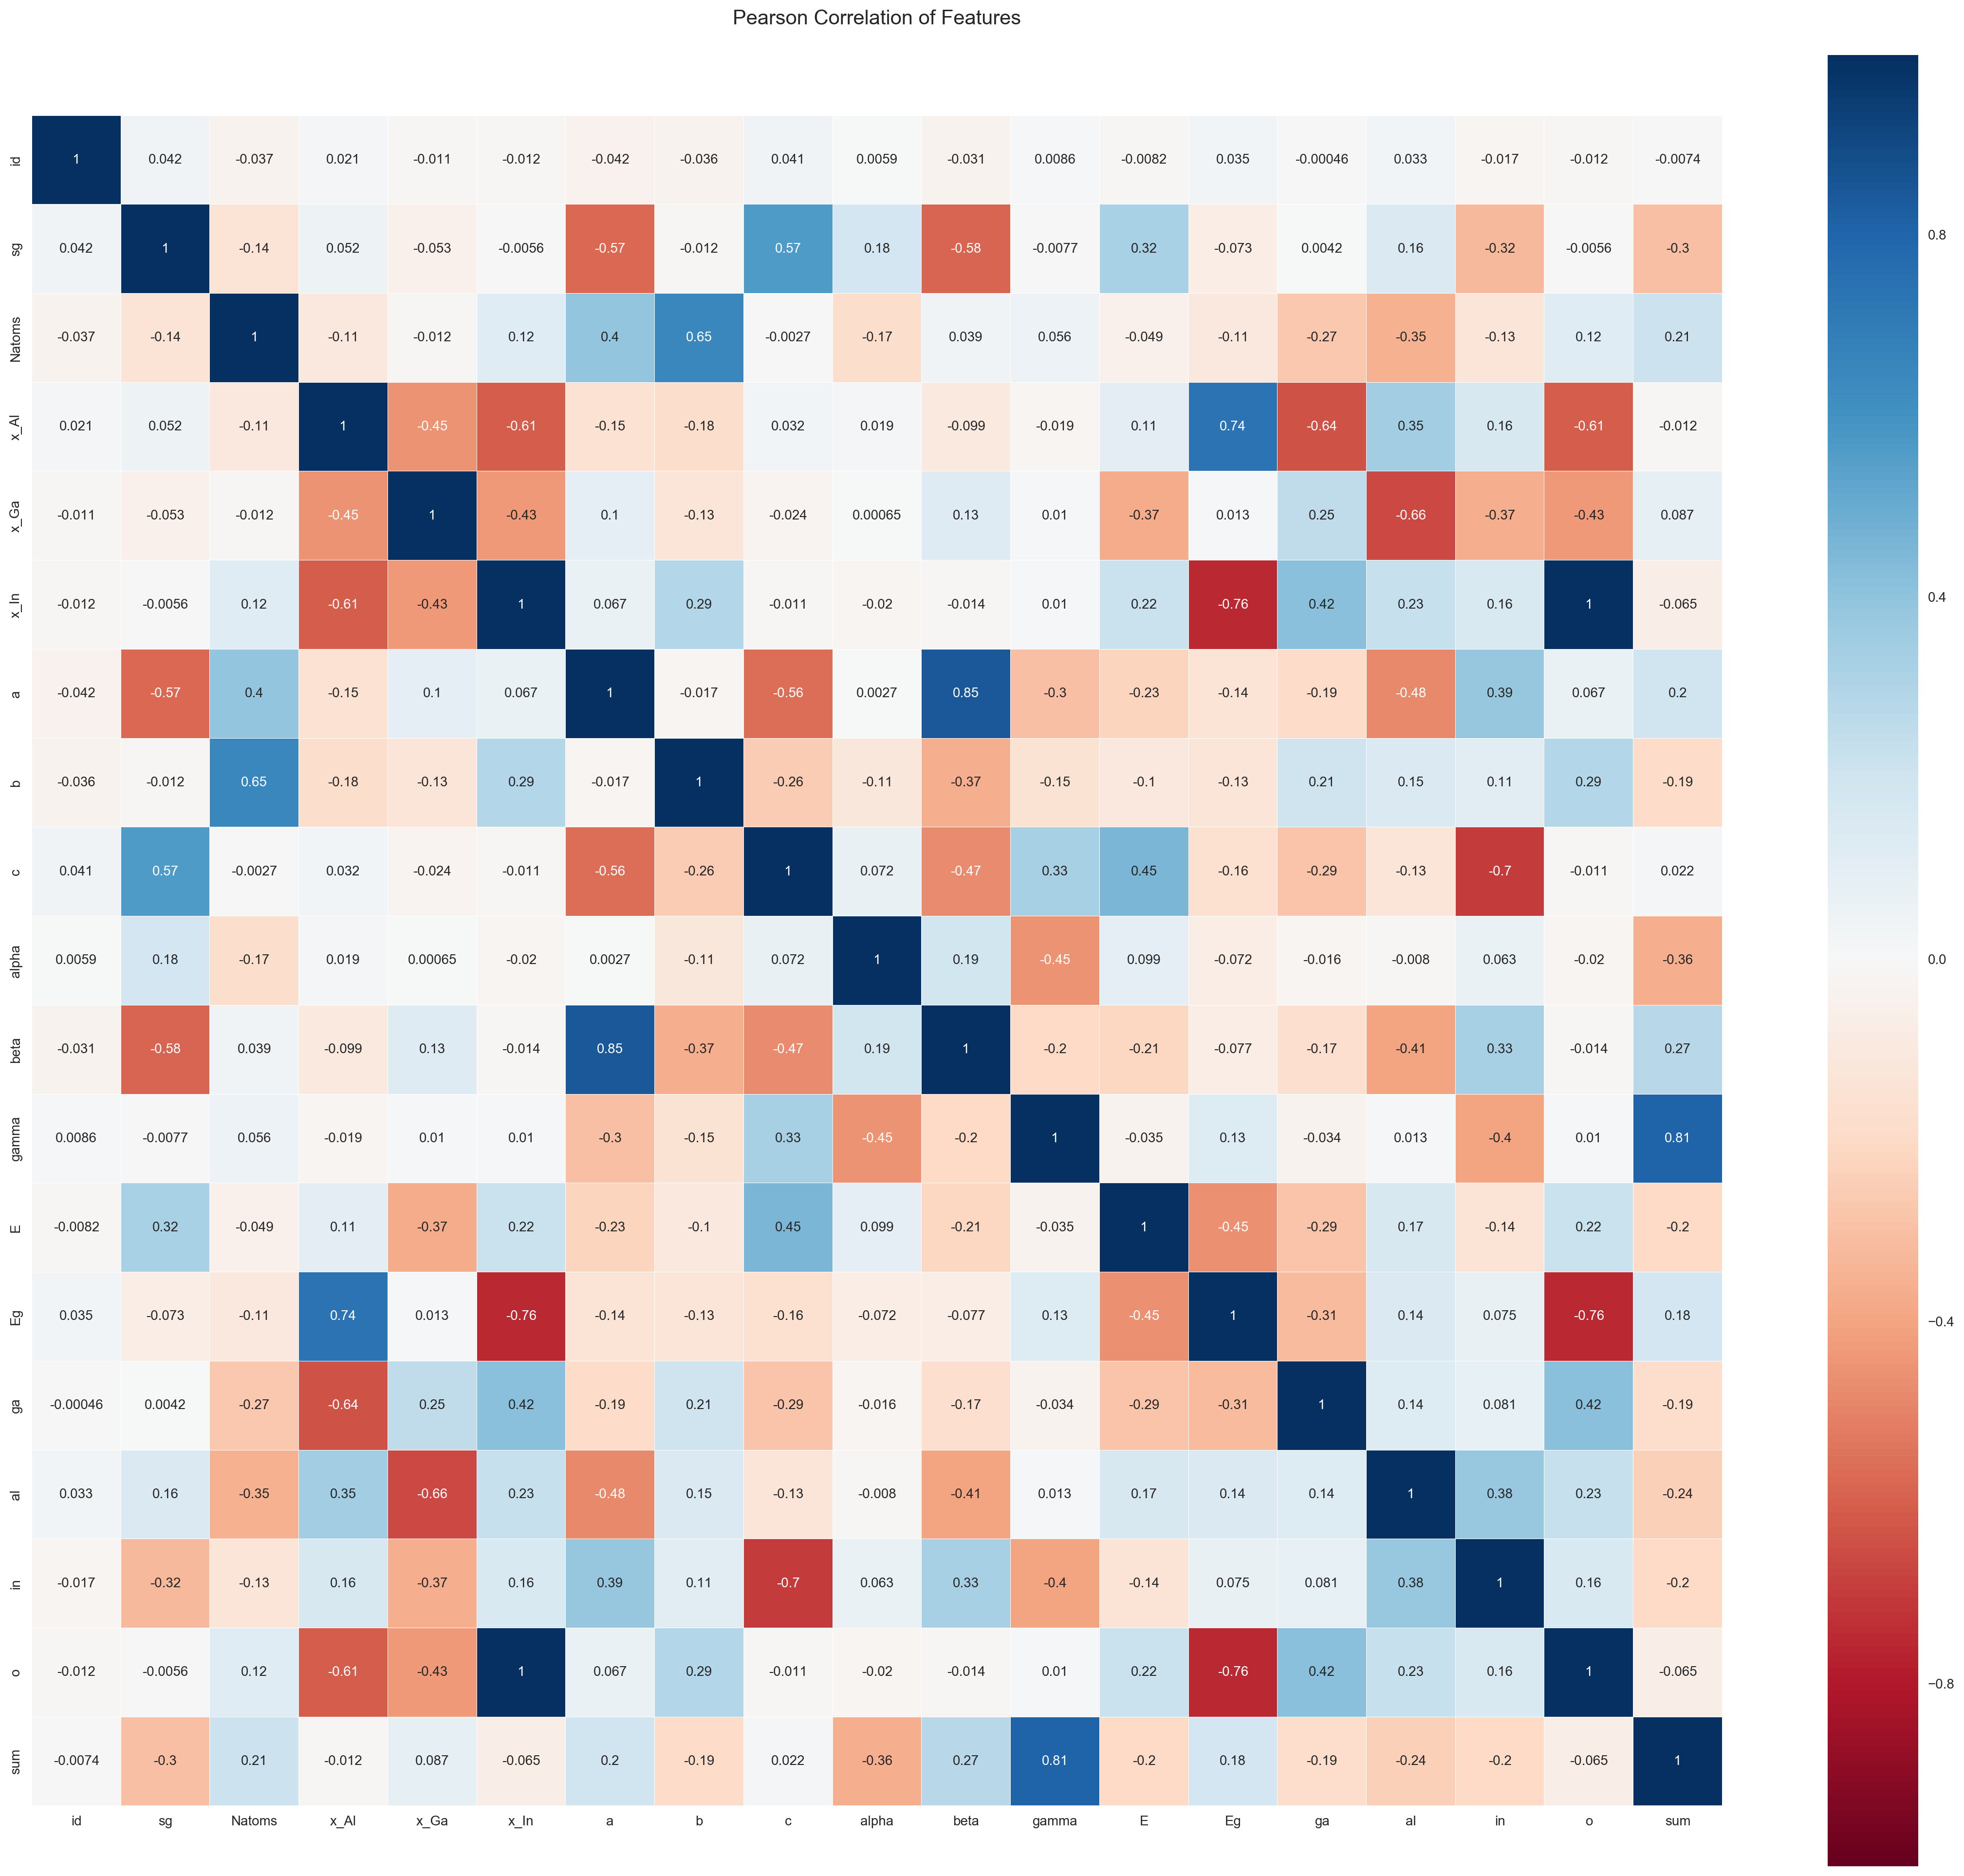

In [145]:
colormap = plt.cm.RdBu
plt.figure(figsize=(28,24))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.astype(float).corr(),linewidths=0.01,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [146]:
#df_train = df_train[df_train.E <= 0.3]

In [147]:
# use random forests to quantify the importances of each feature
from sklearn.ensemble import RandomForestRegressor
# list of columns not to be used for training
non_features = ['id', 'E',"Eg"]

# list of columns to be used for training each model
features = [col for col in list(df_train) if col not in non_features]
print('%i features: %s' % (len(features), features))

# make feature matrix
X = df_train[features].values

# make target columns for each target property
y_Eg = df_train['Eg'].values
y_E = df_train['E'].values


X_train_Eg=X
X_train_E=X
# split into training and test for the purposes of this demonstration
test_size = 0.1
rstate = 42
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X, y_E, 
                                                            test_size=test_size,
                                                            random_state=rstate)
X_train_Eg, X_test_Eg, y_train_Eg, y_test_Eg = train_test_split(X, y_Eg, 
                                                                test_size=test_size, 
                                                                random_state=rstate)
#X_test_Eg  = df_test.drop("id", axis=1).copy()
#X_test_E  = df_test.drop("id", axis=1).copy()


#score counters
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# number of base decision tree estimators
n_est = 100
# maximum depth of any given decision tree estimator
max_depth = 10
# random state variable
rstate = 42
leaf_size=1
acriterion='mse'
# initialize a random forest algorithm
rf_E = RandomForestRegressor(n_estimators=100, 
                             max_depth=100,
                             n_jobs=-1,
                             criterion=acriterion,
                             random_state=rstate,
                             min_samples_split=2,
                             max_features = 10, 
                             min_samples_leaf = 1,
                             oob_score=True)
rf_Eg = RandomForestRegressor(n_estimators=100, 
                             max_depth=100,
                             n_jobs=-1,
                             criterion=acriterion,
                             random_state=rstate,
                             min_samples_split=2,
                             max_features = 10, 
                             min_samples_leaf = leaf_size,
                             oob_score=True)
rf_E.fit(X_train_E, y_train_E)
rf_Eg.fit(X_train_Eg, y_train_Eg)
print rf_E.score(X_train_E, y_train_E)
print rf_Eg.score(X_train_Eg, y_train_Eg)

16 features: ['sg', 'Natoms', 'x_Al', 'x_Ga', 'x_In', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'ga', 'al', 'in', 'o', 'sum']
0.980213695802
0.993561899425


In [148]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf_E.predict(X_train_E)
predicted_test = rf_E.predict(X_test_E)
test_score = r2_score(y_test_E, predicted_test)
spearman = spearmanr(y_test_E, predicted_test)
pearson = pearsonr(y_test_E, predicted_test)
print test_score
print spearman
print pearson

0.860750199949
SpearmanrResult(correlation=0.94925767848461051, pvalue=1.4761267638099847e-121)
(0.92830838923697234, 3.0335275420641003e-104)


RMSLE for formation energies = 0.011 eV/atom (training) and 0.029 eV/atom (test)
RMSLE for band gaps = 0.035 eV (training) and 0.084 eV (test)


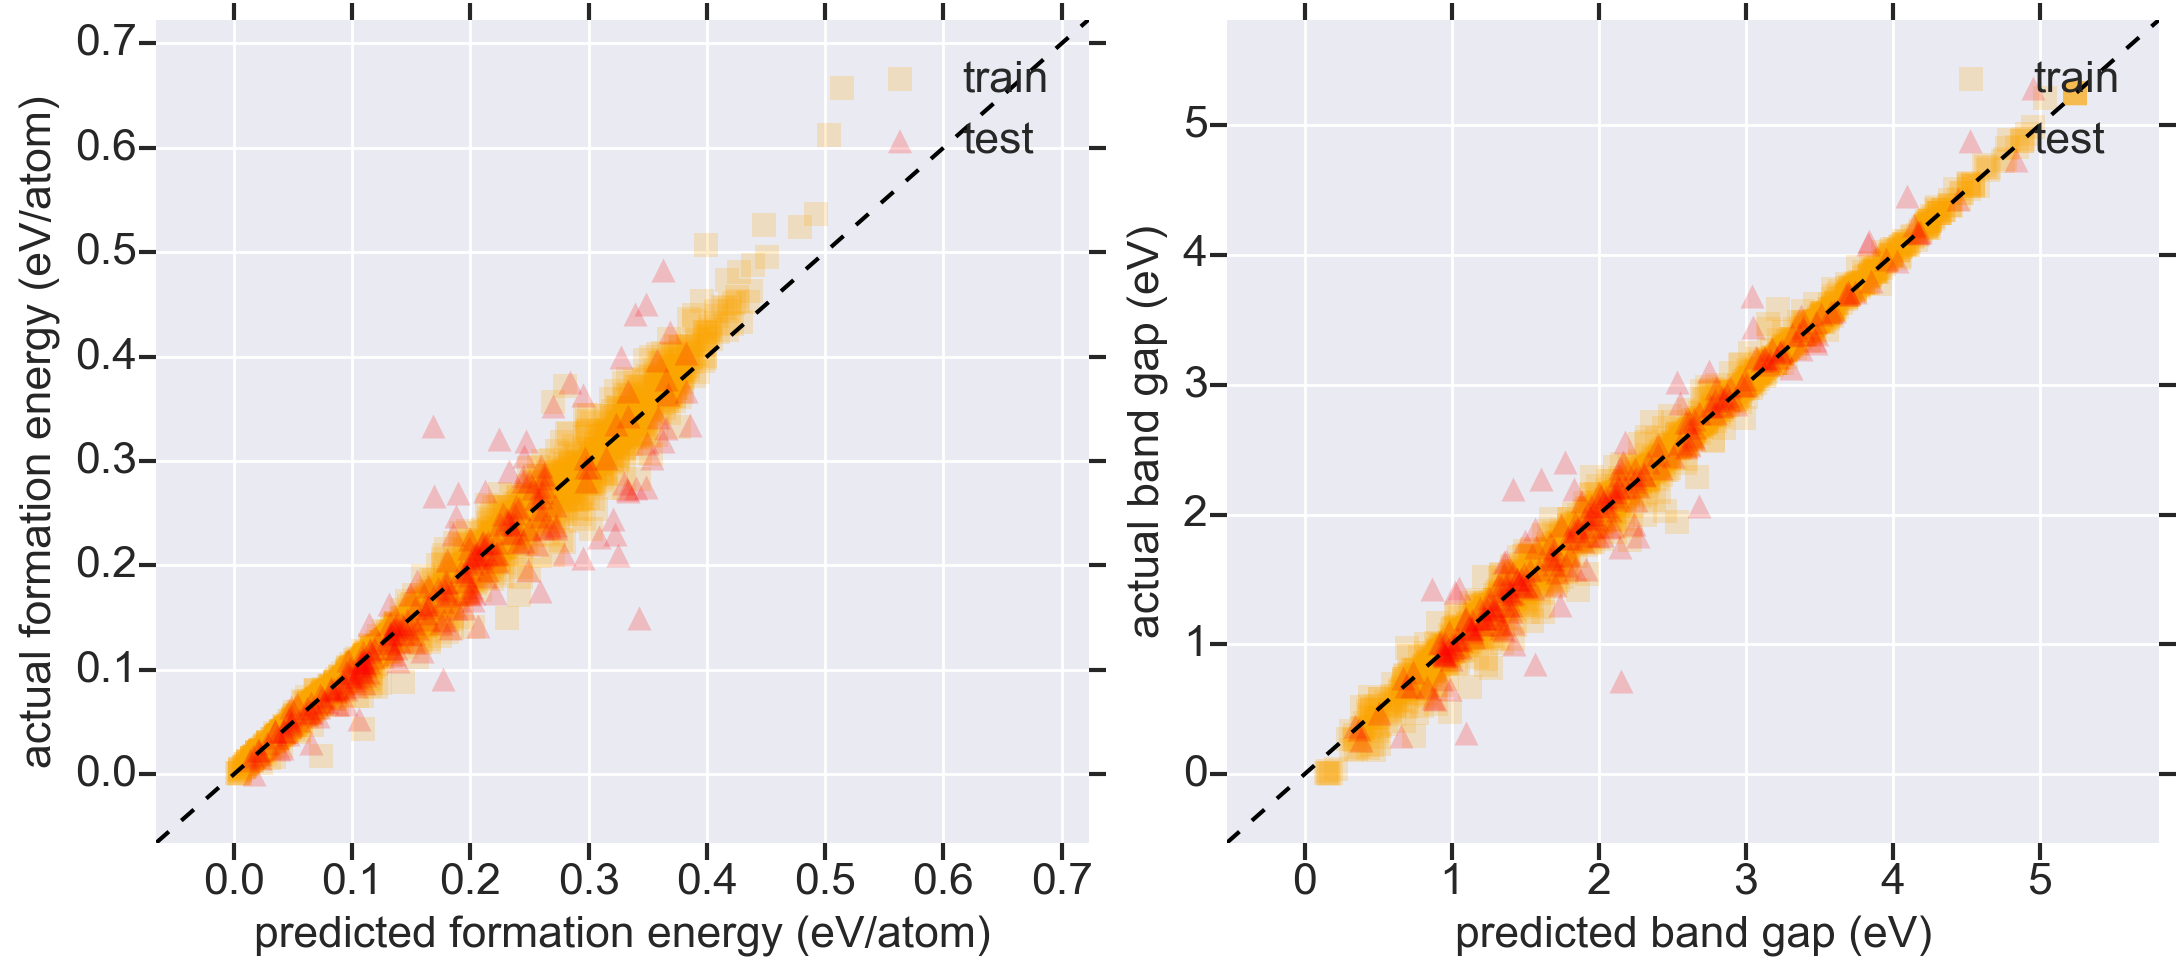

In [152]:
# evaluate performance of the random forest models

def rmsle(actual, predicted):
    """
    Args:
        actual (1d-array) - array of actual values (float)
        predicted (1d-array) - array of predicted values (float)
    Returns:
        root mean square log error (float)
    """
    return np.sqrt(np.mean(np.power(np.log1p(actual)-np.log1p(predicted), 2)))

def plot_actual_pred(train_actual, train_pred, 
                     test_actual, test_pred,
                     target):
    """
    Args:
        train_actual (1d-array) - actual training values (float)
        train_pred (1d-array) - predicted training values (float)
        test_actual (1d-array) - actual test values (float)
        test_pred (1d-array) - predicted test values (float)
        target (str) - target property
    Returns:
        matplotlib scatter plot of actual vs predicted
    """
    s = 75
    lw = 0
    alpha = 0.2
    train_color = 'orange'
    train_marker = 's'
    test_color = 'red'
    test_marker = '^'
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 16
    label = '__nolegend__'
    ax = plt.scatter(train_pred, train_actual,
                     marker=train_marker, color=train_color, s=s, 
                     lw=lw, alpha=alpha, label='train')
    ax = plt.scatter(test_pred, test_actual,
                     marker=test_marker, color=test_color, s=s, 
                     lw=lw, alpha=alpha, label='test')
    ax = plt.legend(frameon=False, fontsize=fontsize, handletextpad=0.4)    
    all_vals = list(train_pred) + list(train_actual) + list(test_pred) + list(test_actual)
    full_range = abs(np.max(all_vals) - np.min(all_vals))
    cushion = 0.1
    xmin = np.min(all_vals) - cushion*full_range
    xmax = np.max(all_vals) + cushion*full_range
    ymin = xmin
    ymax = xmax    
    ax = plt.xlim([xmin, xmax])
    ax = plt.ylim([ymin, ymax])
    ax = plt.plot([xmin, xmax], [ymin, ymax], 
                  lw=axis_width, color='black', ls='--', 
                  label='__nolegend__')
    ax = plt.xlabel('predicted ' + target, fontsize=fontsize)
    ax = plt.ylabel('actual ' + target, fontsize=fontsize)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    return ax  

y_train_E_pred = rf_E.predict(X_train_E)
y_test_E_pred = rf_E.predict(X_test_E)
target_E = 'formation energy (eV/atom)'
print('RMSLE for formation energies = %.3f eV/atom (training) and %.3f eV/atom (test)' 
      % (rmsle(y_train_E, y_train_E_pred),  (rmsle(y_test_E, y_test_E_pred))))
y_train_Eg_pred = rf_Eg.predict(X_train_Eg)
y_test_Eg_pred = rf_Eg.predict(X_test_Eg)
target_Eg = 'band gap (eV)'
print('RMSLE for band gaps = %.3f eV (training) and %.3f eV (test)' 
      % (rmsle(y_train_Eg, y_train_Eg_pred), (rmsle(y_test_Eg, y_test_Eg_pred))))
fig4 = plt.figure(4, figsize=(11,5))
ax1 = plt.subplot(121)
ax1 = plot_actual_pred(y_train_E, y_train_E_pred,
                       y_test_E, y_test_E_pred,
                       target_E)
ax2 = plt.subplot(122)
ax2 = plot_actual_pred(y_train_Eg, y_train_Eg_pred,
                       y_test_Eg, y_test_Eg_pred,
                       target_Eg)
plt.tight_layout()
plt.show()
plt.close()

In [154]:
# report the most important featuers for predicting each target

# collect ranking of most "important" features for E
importances_E =  rf_E.feature_importances_
descending_indices_E = np.argsort(importances_E)[::-1]
sorted_importances_E = [importances_E[idx] for idx in descending_indices_E]
sorted_features_E = [features[idx] for idx in descending_indices_E]
print('most important feature for formation energy is %s' % sorted_features_E[0])

# collect ranking of most "important" features for Eg
importances_Eg =  rf_Eg.feature_importances_
descending_indices_Eg = np.argsort(importances_Eg)[::-1]
sorted_importances_Eg = [importances_Eg[idx] for idx in descending_indices_Eg]
sorted_features_Eg = [features[idx] for idx in descending_indices_Eg]
print('most important feature for band gap is %s' % sorted_features_Eg[0])

most important feature for formation energy is c
most important feature for band gap is o


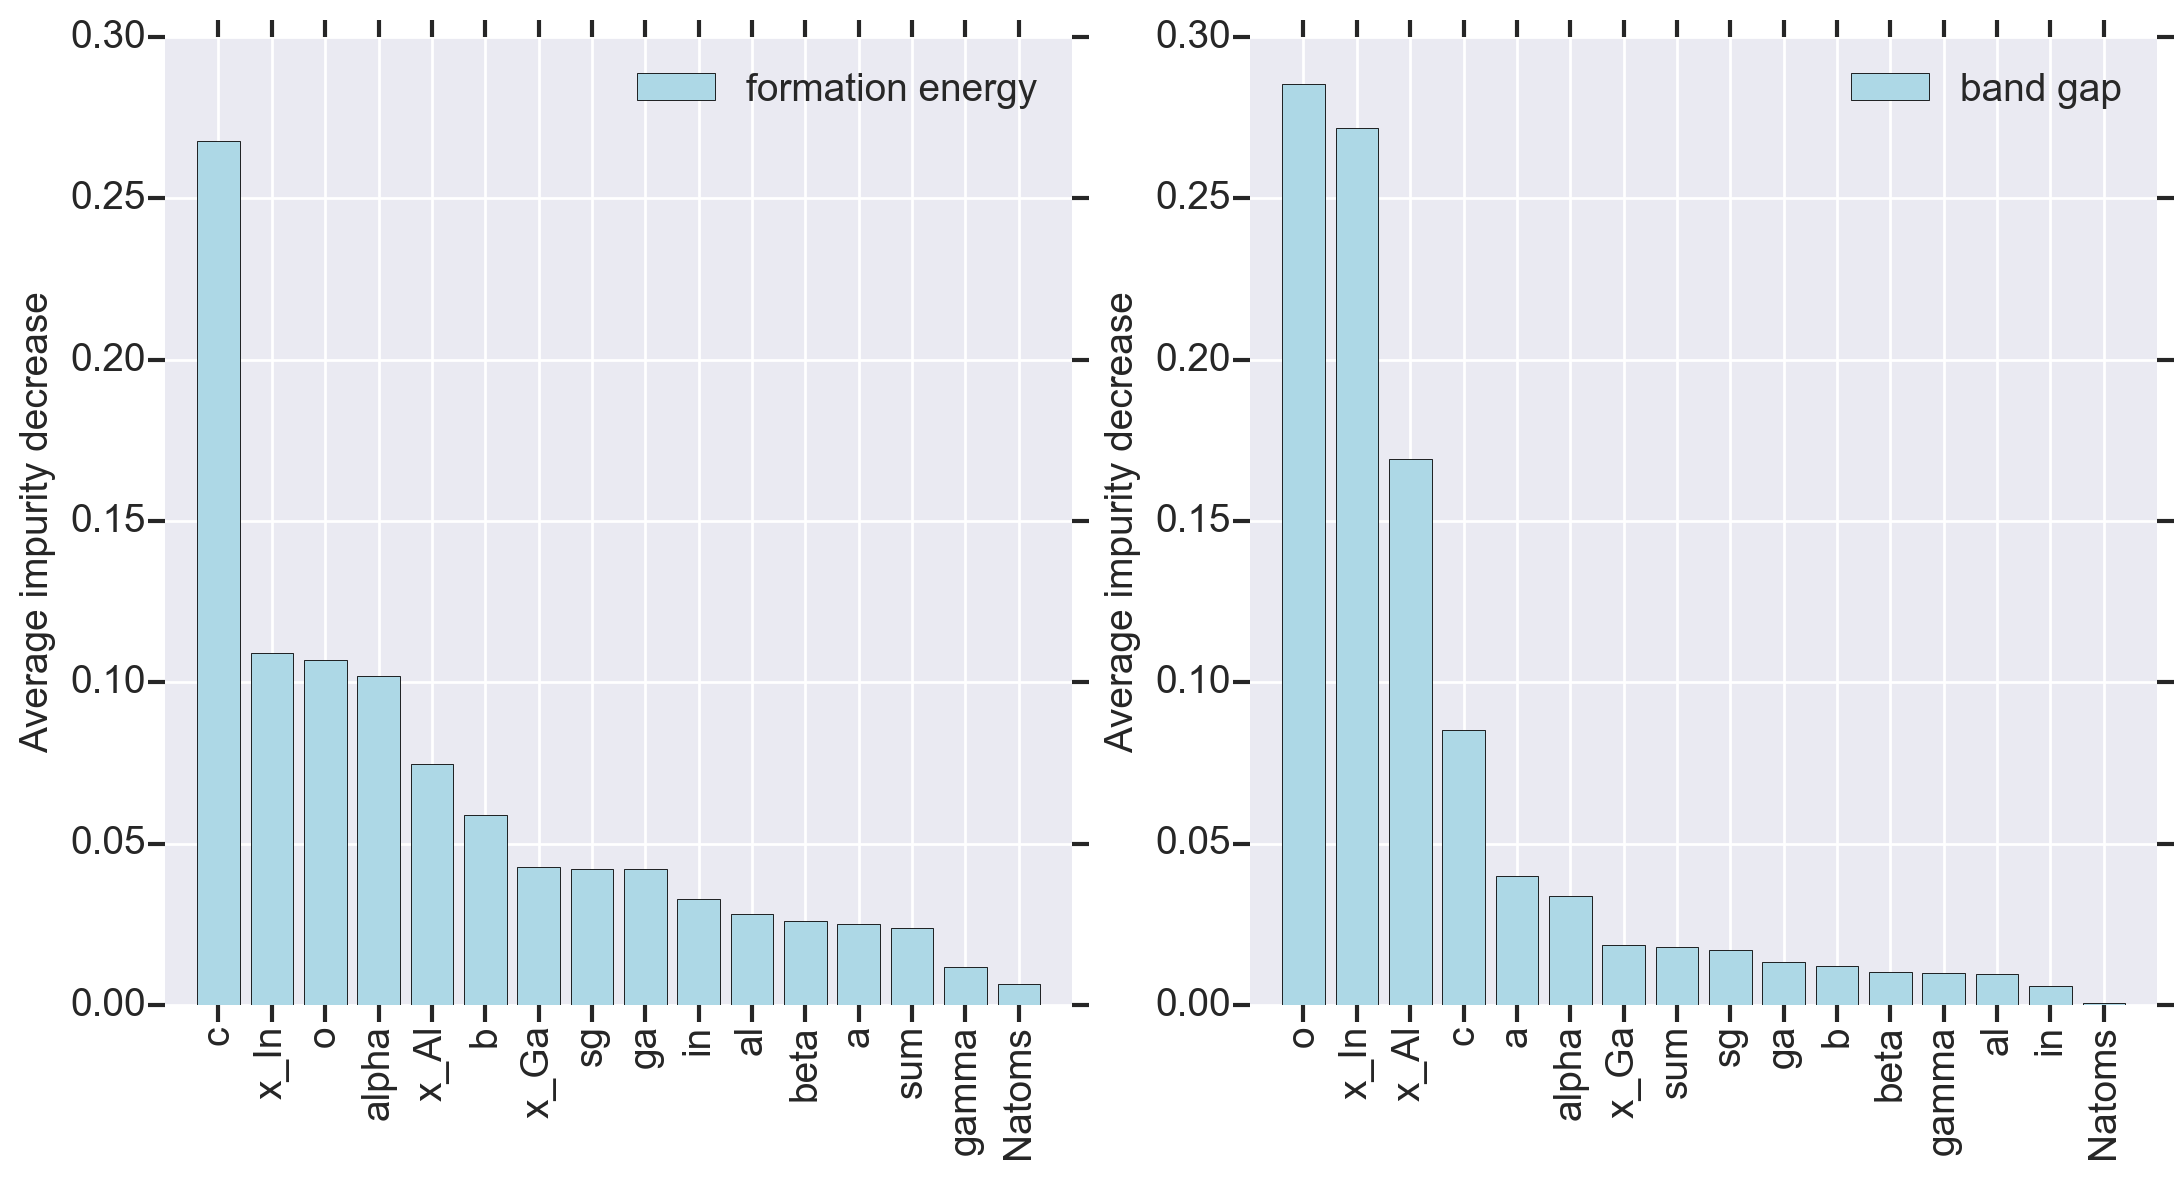

In [155]:
# plot the feature importances

def plot_importances(X_train, sorted_features, sorted_importances):
    """
    Args:
        X_train (nd-array) - feature matrix of shape (number samples, number features)
        sorted_features (list) - feature names (str)
        sorted_importances (list) - feature importances (float)
    Returns:
        matplotlib bar chart of sorted importances
    """
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'lightblue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(X_train.shape[1]), sorted_importances,
                 color=bar_color, align=align, label=label)
    ax = plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
    ax = plt.xlim([-1, X_train.shape[1]])
    ax = plt.ylabel('Average impurity decrease', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

fig3 = plt.figure(3, figsize=(11,6))
ax1 = plt.subplot(121)
ax1 = plot_importances(X_train_E, sorted_features_E, sorted_importances_E)
ax1 = plt.legend(['formation energy'], fontsize=14, frameon=False)
ax2 = plt.subplot(122)
ax2 = plot_importances(X_train_Eg, sorted_features_Eg, sorted_importances_Eg)
ax2 = plt.legend(['band gap'], fontsize=14, frameon=False)
plt.tight_layout()
plt.show()
plt.close()

In [156]:
df_test.head()

,id,sg,Natoms,x_Al,x_Ga,x_In,a,b,c,alpha,beta,gamma,ga_0,ga_1,ga_2,ga_3,ga_4,ga_5,al_0,al_1,al_2,al_3,al_4,al_5,in_0,in_1,in_2,in_3,in_4,in_5,o_0,o_1,o_2,o_3,o_4,o_5,ga,al,in,o,sum
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006,-1.217431,7.615849,9.922421,-3.061302,-8.704990,-4.554548,5.765706,-0.819612,-1.753608,3.548391,-4.012098,-2.728779,-6.939157,-3.962924,-0.814587,6.795588,7.753744,-2.832664,-10.077103,-12.721040,17.684365,-1.242266,-7.607262,13.963306,-4.012098,-8.704990,-1.217431,0.1875,0.012534
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015,7.094650,-1.096057,-2.508329,6.161241,-4.586321,-5.065184,-2.343354,9.032044,-8.342452,-6.184483,10.685806,-2.847561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.048054,-12.233763,16.723316,-0.688336,-7.675262,12.922098,-8.342452,-5.065184,7.094650,0.0000,0.012947
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014,-4.353754,0.324080,-5.143576,-0.306597,9.497330,-0.017483,-5.497190,-2.404426,-3.936175,2.685165,9.433365,-0.280739,-4.914356,-1.223963,-3.590513,1.357926,8.504869,-0.133963,-12.111092,-4.421025,-6.519648,5.403909,18.630740,-0.982884,-5.497190,-5.143576,-4.353754,0.1667,0.013654
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002,31.651253,-0.167255,-14.677610,3.542080,-16.973643,-3.374826,29.600857,-0.540030,-17.508598,-4.156969,-12.092260,4.696999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.256826,-0.245287,-27.863888,-7.807420,-25.392938,8.052706,-17.508598,-16.973643,5.762000,0.0000,0.013931
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001,27.417968,-0.285408,-14.883274,-4.855191,-12.534694,5.140599,19.834144,-0.233128,-11.459003,-2.132510,-8.375141,2.365637,27.301489,-0.108903,-12.967463,3.317993,-14.334026,-3.209089,53.434182,-0.260821,-27.962429,-8.262954,-25.471754,8.523775,-11.459003,-14.883274,6.158900,0.1875,0.014640


In [157]:
# use random forests to quantify the importances of each feature
from sklearn.ensemble import RandomForestRegressor
# list of columns not to be used for training
non_features = ['id', 'E',"Eg"]#,"ga_0","ga_1","ga_2","ga_3","ga_4","ga_5","in_0","in_1","in_2","in_3","in_4","in_5",
                #"al_0","al_1","al_2","al_3","al_4","al_5","o_0","o_1","o_2","o_3","o_4","o_5"]

# list of columns to be used for training each model
features = [col for col in list(df_train) if col not in non_features]
print('%i features: %s' % (len(features), features))

# make feature matrix
X = df_train[features].values

# make target columns for each target property
y_train_Eg = df_train['Eg'].values
y_train_E = df_train['E'].values


X_train_Eg=df_train[features].copy()
X_train_E=df_train[features].copy()
# split into training and test for the purposes of this demonstration
test_size = 0.1
rstate = 42
#X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X, y_E, 
#                                                            test_size=test_size,
#                                                            random_state=rstate)
#X_train_Eg, X_test_Eg, y_train_Eg, y_test_Eg = train_test_split(X, y_Eg, 
#                                                                test_size=test_size, 
#                                                                random_state=rstate)
X_test_Eg  = df_test[features].copy()
X_test_E  = df_test[features].copy()


#score counters
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# number of base decision tree estimators
n_est = 300
# maximum depth of any given decision tree estimator
max_depth = 50
# random state variable
rstate = 42
leaf_size=1
acriterion='mse'
# initialize a random forest algorithm
rf_E = RandomForestRegressor(n_estimators=390, 
                             max_depth=35,
                             n_jobs=-1,
                             criterion=acriterion,
                             random_state=12,
                             min_samples_split=2,
                             max_features = 14, 
                             min_samples_leaf = 1,
                             min_impurity_decrease = 0,
                             oob_score=True)
rf_Eg = RandomForestRegressor(n_estimators=450, 
                             max_depth=38,
                             n_jobs=-1,
                             criterion=acriterion,
                             random_state=11,
                             min_samples_split=2,
                             max_features = 9, 
                             min_samples_leaf = leaf_size,
                             min_impurity_decrease = 0,
                             oob_score=True)
# fit to training data
rf_E.fit(X_train_E, y_train_E)
rf_Eg.fit(X_train_Eg, y_train_Eg)
print rf_E.score(X_train_E, y_train_E)
print rf_Eg.score(X_train_Eg, y_train_Eg)

16 features: ['sg', 'Natoms', 'x_Al', 'x_Ga', 'x_In', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'ga', 'al', 'in', 'o', 'sum']
0.980521220736
0.993675244977


In [158]:
print rf_E.score(X_train_E, y_train_E)
print rf_Eg.score(X_train_Eg, y_train_Eg)

0.980521220736
0.993675244977


In [159]:
y_test_Eg_pred=rf_Eg.predict(X_test_Eg)
y_test_E_pred=rf_E.predict(X_test_E)

In [160]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


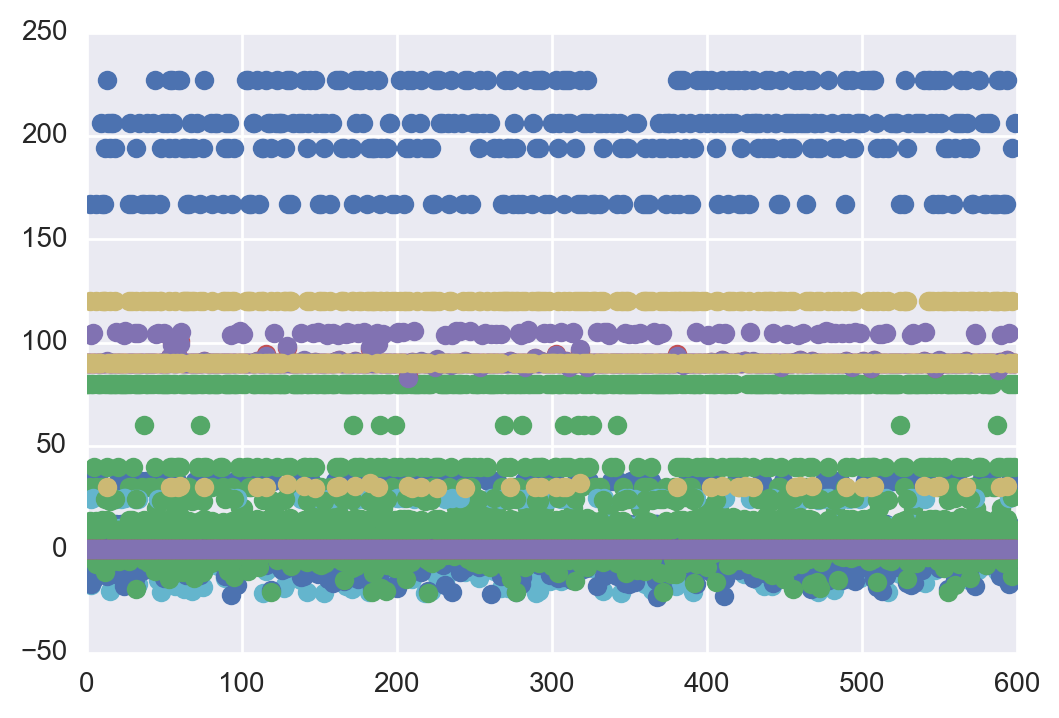

In [161]:
plt.plot(X_test_Eg,'o')

In [162]:
submission = pd.DataFrame({
        "id": test["id"],
        "formation_energy_ev_natom": y_test_E_pred,
        "bandgap_energy_ev": y_test_Eg_pred,
        
    })
submission.to_csv('/Users/sergey/Desktop/semi/submission.csv', index=False)

In [ ]:
submission.shape

In [ ]:
X_test_E.shape

In [ ]:
X_train_E.shape

In [19]:
new_test.head(10)

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,...,in_2,in_3,in_4,in_5,o_0,o_1,o_2,o_3,o_4,o_5
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,...,-0.814587,6.795588,7.753744,-2.832664,-10.077103,-12.721040,17.684365,-1.242266,-7.607262,13.963306
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,...,0.000000,0.000000,0.000000,0.000000,-9.048054,-12.233763,16.723316,-0.688336,-7.675262,12.922098
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,...,-3.590513,1.357926,8.504869,-0.133963,-12.111092,-4.421025,-6.519648,5.403909,18.630740,-0.982884
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,...,0.000000,0.000000,0.000000,0.000000,53.256826,-0.245287,-27.863888,-7.807420,-25.392938,8.052706
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,...,-12.967463,3.317993,-14.334026,-3.209089,53.434182,-0.260821,-27.962429,-8.262954,-25.471754,8.523775
5,6,33,40.0,1.0000,0.0000,0.0000,4.8885,8.4018,9.0344,90.0061,...,0.000000,0.000000,0.000000,0.000000,-1.659083,9.069547,10.529937,-3.371383,-8.870854,-5.698164
6,7,167,30.0,0.3333,0.6667,0.0000,4.9772,4.9768,13.4593,89.9952,...,0.000000,0.000000,0.000000,0.000000,-12.083270,-4.418335,-6.509503,5.399393,18.592773,-0.981057
7,8,33,80.0,0.1875,0.6875,0.1250,10.2955,8.8306,9.4505,89.9988,...,-2.833349,-1.293791,-0.153570,2.397783,-9.714156,-12.539819,17.342637,-1.047369,-7.628481,13.587189
8,9,33,80.0,0.3125,0.6875,0.0000,10.0984,8.6759,9.2968,89.9995,...,0.000000,0.000000,0.000000,0.000000,-9.405084,-12.390501,17.052821,-0.881534,-7.647738,13.272036
9,10,206,80.0,0.7500,0.0000,0.2500,9.3111,9.3105,9.3108,90.0016,...,5.438271,-1.989579,-4.944944,-2.651034,-12.060204,-8.374051,-1.222479,14.630835,13.282683,-6.256784
